In [1]:
from New_GUI_Analysis_Functions import *
%matplotlib widget

# Plotting Intrinsic Properties

In [2]:
cell_properties_to_plot = ['steady_state_input_resistance', 'Voltage_sag']

In [3]:
'''WT'''

NMDG_dir_path = '/Users/samgritz/Library/CloudStorage/GoogleDrive-gritz122@gmail.com/My Drive/Rutgers/Milstein_Lab_Data/GNB1_WT_Project/New_Analysis_Processed_Data/WT_data/Processed_data/WT_042024_on_processed_data/NMDG'
sucrose_dir_path = '/Users/samgritz/Library/CloudStorage/GoogleDrive-gritz122@gmail.com/My Drive/Rutgers/Milstein_Lab_Data/GNB1_WT_Project/New_Analysis_Processed_Data/WT_data/Processed_data/WT_042024_on_processed_data/Sucrose'
NMDG_older_dir_path = '/Users/samgritz/Library/CloudStorage/GoogleDrive-gritz122@gmail.com/My Drive/Rutgers/Milstein_Lab_Data/GNB1_WT_Project/New_Analysis_Processed_Data/WT_data/Processed_data/WT_Before_04222024_processed_data' 

'''GNB1'''

NMDG_dir_path_GNB1 = '/Users/samgritz/Library/CloudStorage/GoogleDrive-gritz122@gmail.com/My Drive/Rutgers/Milstein_Lab_Data/GNB1_WT_Project/New_Analysis_Processed_Data/GNB1_data/Processed_data/GNB1_0420204_on_processed_data/NMDG'
sucrose_dir_path_GNB1 = '/Users/samgritz/Library/CloudStorage/GoogleDrive-gritz122@gmail.com/My Drive/Rutgers/Milstein_Lab_Data/GNB1_WT_Project/New_Analysis_Processed_Data/GNB1_data/Processed_data/GNB1_0420204_on_processed_data/Sucrose'
GNB1_older_dir_path = '/Users/samgritz/Library/CloudStorage/GoogleDrive-gritz122@gmail.com/My Drive/Rutgers/Milstein_Lab_Data/GNB1_WT_Project/New_Analysis_Processed_Data/GNB1_data/Processed_data/GNB1_Before_04222024_processed_data'

In [7]:
'''WT'''
NMDG_intrinsic_properties = get_intrinsic_properties_cells(NMDG_dir_path, cell_properties_to_plot)
sucrose_intrinsic_properties = get_intrinsic_properties_cells(sucrose_dir_path, cell_properties_to_plot)
NMDG_older_intrinsic_properties = get_intrinsic_properties_cells(NMDG_older_dir_path, cell_properties_to_plot)

'''WT Data before 04222024'''

'''GNB1'''
GNB1_NMDG_intrinsic_properties = get_intrinsic_properties_cells(NMDG_dir_path_GNB1, cell_properties_to_plot)
GNB1_sucrose_intrinsic_properties = get_intrinsic_properties_cells(sucrose_dir_path_GNB1, cell_properties_to_plot)
GNB1_NMDG_older_intrinsic_properties = get_intrinsic_properties_cells(GNB1_older_dir_path, cell_properties_to_plot)



In [8]:
# GNB1_sucrose_intrinsic_properties

### Plotting WT intrinsic Properties

NameError: name 'stats' is not defined

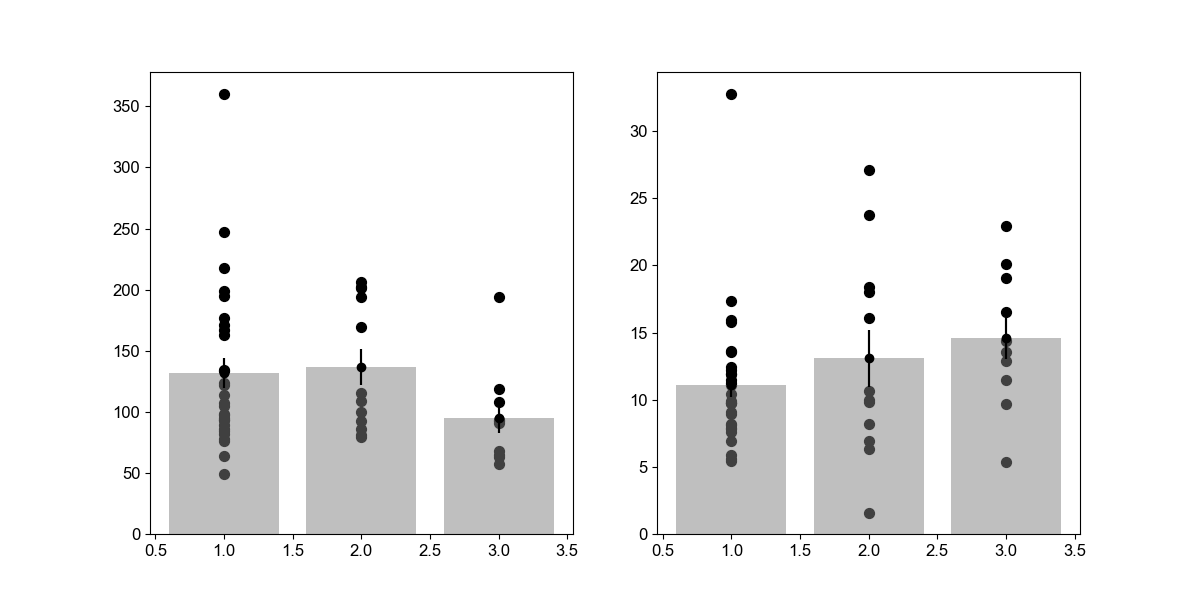

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Lists to hold all values for calculations
NMDG_older_all_input_resistance, NMDG_older_all_voltage_sag = [], []
NMDG_all_input_resistance, NMDG_all_voltage_sag = [], []
Sucrose_all_input_resistance, Sucrose_all_voltage_sag = [], []

# Scatter plot for NMDG Older data
for cell in NMDG_older_intrinsic_properties:
    if NMDG_older_intrinsic_properties[cell]:
        NMDG_older_all_input_resistance.append(NMDG_older_intrinsic_properties[cell]['steady_state_input_resistance']) 
        NMDG_older_all_voltage_sag.append(NMDG_older_intrinsic_properties[cell]['Voltage_sag'])
        ax[0].scatter(1, NMDG_older_intrinsic_properties[cell]['steady_state_input_resistance'], color='black', s=50)
        ax[1].scatter(1, NMDG_older_intrinsic_properties[cell]['Voltage_sag'], color='black', s=50)

# Scatter plot for NMDG data
for cell in NMDG_intrinsic_properties:
    if NMDG_intrinsic_properties[cell]:
        NMDG_all_input_resistance.append(NMDG_intrinsic_properties[cell]['steady_state_input_resistance'])
        NMDG_all_voltage_sag.append(NMDG_intrinsic_properties[cell]['Voltage_sag'])
        ax[0].scatter(2, NMDG_intrinsic_properties[cell]['steady_state_input_resistance'], color='black', s=50)
        ax[1].scatter(2, NMDG_intrinsic_properties[cell]['Voltage_sag'], color='black', s=50)

# Scatter plot for Sucrose data
for cell in sucrose_intrinsic_properties:
    if sucrose_intrinsic_properties[cell]:
        Sucrose_all_input_resistance.append(sucrose_intrinsic_properties[cell]['steady_state_input_resistance'])
        Sucrose_all_voltage_sag.append(sucrose_intrinsic_properties[cell]['Voltage_sag'])
        ax[0].scatter(3, sucrose_intrinsic_properties[cell]['steady_state_input_resistance'], color='black', s=50)
        ax[1].scatter(3, sucrose_intrinsic_properties[cell]['Voltage_sag'], color='black', s=50)

# Plot for Steady State Input Resistance
plot_means_with_error(ax[0], 1, NMDG_older_all_input_resistance)
plot_means_with_error(ax[0], 2, NMDG_all_input_resistance)
plot_means_with_error(ax[0], 3, Sucrose_all_input_resistance)

# Plot for Voltage Sag
plot_means_with_error(ax[1], 1, NMDG_older_all_voltage_sag)
plot_means_with_error(ax[1], 2, NMDG_all_voltage_sag)
plot_means_with_error(ax[1], 3, Sucrose_all_voltage_sag)

# Adding p-values and comparison lines to the plots with improved spacing
plot_comparison(ax[0], 1, 2, NMDG_older_all_input_resistance, NMDG_all_input_resistance, 275, offset=10, p_offset=14)
plot_comparison(ax[0], 1, 3, NMDG_older_all_input_resistance, Sucrose_all_input_resistance, 295, offset=25, p_offset=30)
plot_comparison(ax[0], 2, 3, NMDG_all_input_resistance, Sucrose_all_input_resistance, 315, offset=40, p_offset=44)

# Adjusted values to better match the format of the left plot
plot_comparison(ax[1], 1, 2, NMDG_older_all_voltage_sag, NMDG_all_voltage_sag, 22, offset=0, p_offset=1)
plot_comparison(ax[1], 1, 3, NMDG_older_all_voltage_sag, Sucrose_all_voltage_sag, 30, offset=2, p_offset=2)
plot_comparison(ax[1], 2, 3, NMDG_all_voltage_sag, Sucrose_all_voltage_sag, 40, offset=2, p_offset=2)


# Setting x-axis labels and titles
ax[0].set_xticks([1, 2, 3])
ax[0].set_xticklabels(['NMDG Older', 'NMDG', 'Sucrose'])
ax[0].set_title('Steady State Input Resistance Comparison')
ax[0].set_ylabel('Input Resistance (MOhm)')

ax[1].set_xticks([1, 2, 3])
ax[1].set_xticklabels(['NMDG Older', 'NMDG', 'Sucrose'])
ax[1].set_title('Voltage Sag Comparison')
ax[1].set_ylabel('Voltage Sag (mV)')

fig.tight_layout



In [10]:
#combine the NMDG older and NMDG data
combined_WT_NMDG_input_resistance = {**NMDG_older_intrinsic_properties, **NMDG_intrinsic_properties}

In [11]:
# fig, ax = plt.subplots(2,1, figsize=(5, 10))

# fig.suptitle('WT Intrinsic Properties combined NMDG')

# all_input_resistances_WT_NMDG, all_voltage_sags_WT_NMDG = plot_intrinsic_properties_multiple_cells(combined_WT_NMDG_input_resistance, ax)


# fig. tight_layout(rect=[0, 0.03, 1, 0.95])

# fig, ax = plt.subplots(2,1, figsize=(5, 10))

# fig.suptitle('WT Intrinsic Properties combined NMDG and Sucrose')

# all_input_resistances_WT, _ = plot_intrinsic_properties_multiple_cells(combined_WT_intrinsic_properties, ax)

# fig. tight_layout(rect=[0, 0.03, 1, 0.95])

# #p-values for the combined WT data

# #compare combined WT NMDG to combined WT NMDG and Sucrose

# input_resistance_WT_NMDG = all_input_resistances_WT_NMDG
# input_resistance_WT = all_input_resistances_WT

# voltage_sag_WT_NMDG = all_voltage_sags_WT_NMDG
# voltage_sag_WT = all_voltage_sags_WT

# p_value_input_resistance_WT_NMDG_WT = stats.ttest_ind(input_resistance_WT_NMDG, input_resistance_WT, equal_var=False)

# p_value_voltage_sag_WT_NMDG_WT = stats.ttest_ind(voltage_sag_WT_NMDG, voltage_sag_WT, equal_var=False)

# print('WT NMDG vs WT Input Resistance:', p_value_input_resistance_WT_NMDG_WT)



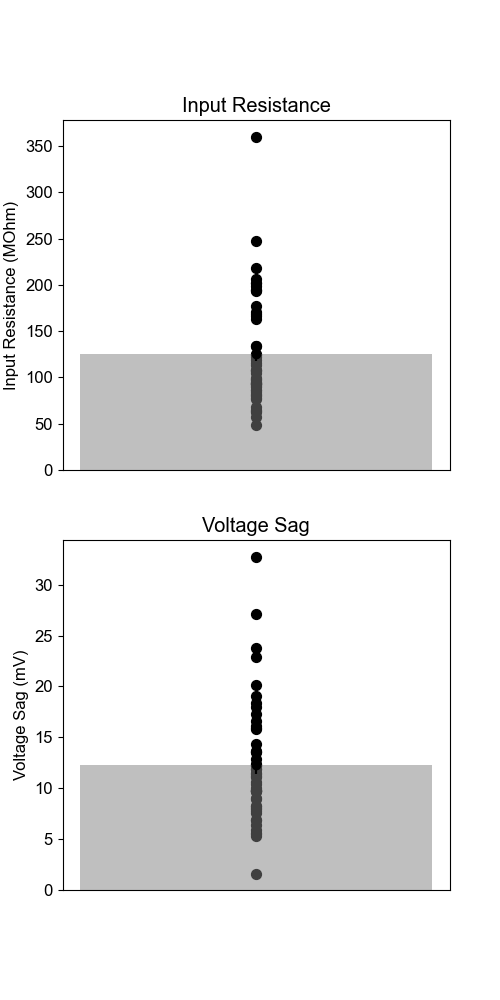

In [12]:
#All cell combined intrinsic properties
combined_WT_intrinsic_properties = {**combined_WT_NMDG_input_resistance , **sucrose_intrinsic_properties}

fig, ax = plt.subplots(2,1, figsize=(5, 10))
#All cells input resistances 
all_input_resistances_WT, _ = plot_intrinsic_properties_multiple_cells(combined_WT_intrinsic_properties, ax)

## Newer Combined WT data - holding potential and current injection all the same - use Newer for Voltage Sag

In [13]:
##Newer Combined WT data - holding potential and current injection all the same 
newer_WT_intrinsic_properties = {**NMDG_intrinsic_properties, **sucrose_intrinsic_properties}

# fig. tight_layout(rect=[0, 0.03, 1, 0.95])

# fig, ax = plt.subplots(2,1, figsize=(5, 10))

# fig.suptitle('WT Intrinsic Properties Newer Data')

#Voltage sag for after 04222024 data
_, newer_all_voltage_sags_WT = plot_intrinsic_properties_multiple_cells(newer_WT_intrinsic_properties , ax)


In [14]:
#clear all figures 
plt.close('all')

### plotting GNB1 intrinsic Properties

NameError: name 'stats' is not defined

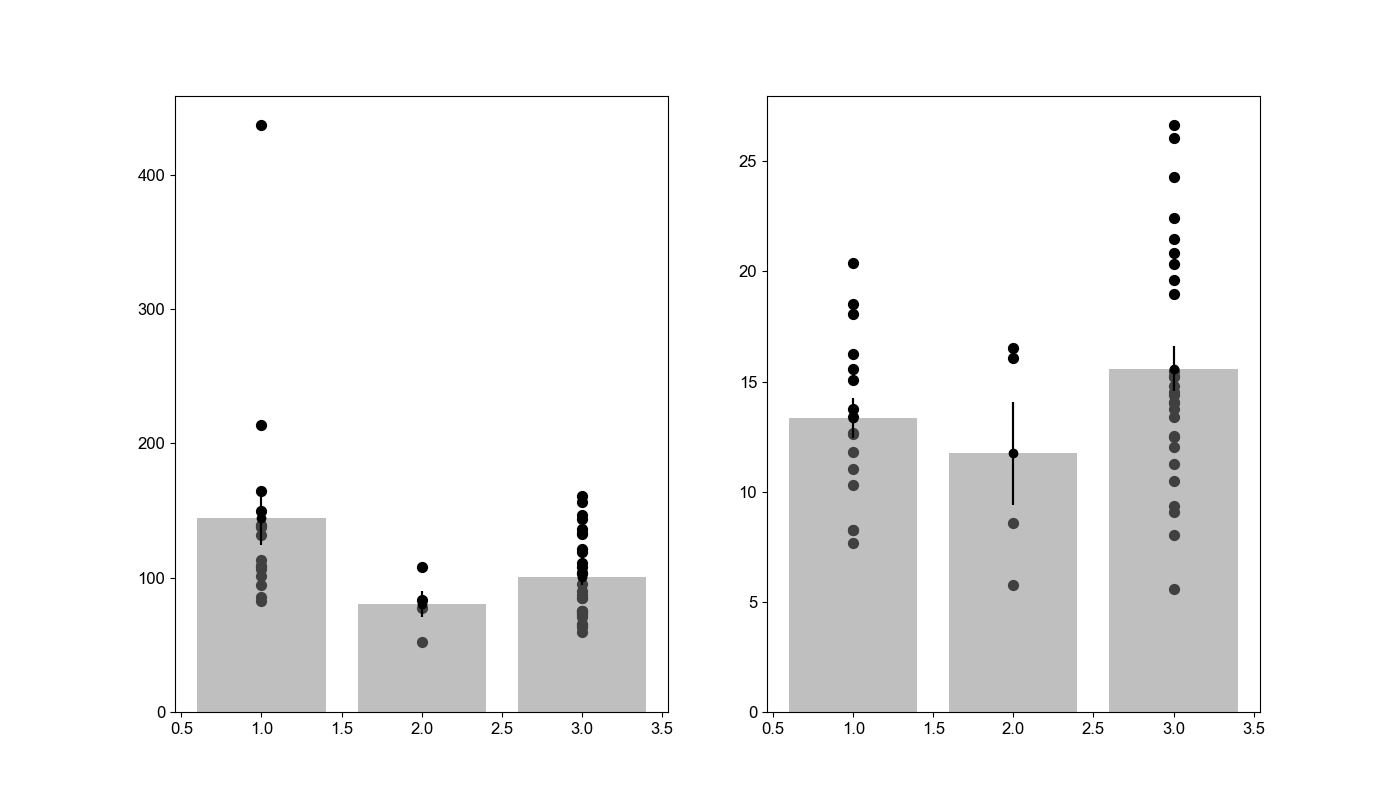

In [15]:
# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 8))

# Lists to hold all values for calculations
GNB1_NMDG_older_all_input_resistance, GNB1_NMDG_older_all_voltage_sag = [], []
GNB1_NMDG_all_input_resistance, GNB1_NMDG_all_voltage_sag = [], []
GNB1_sucrose_all_input_resistance, GNB1_sucrose_all_voltage_sag = [], []

# Scatter plot for NMDG Older data
for cell in GNB1_NMDG_older_intrinsic_properties:
    if GNB1_NMDG_older_intrinsic_properties[cell]:
        GNB1_NMDG_older_all_input_resistance.append(GNB1_NMDG_older_intrinsic_properties[cell]['steady_state_input_resistance']) 
        GNB1_NMDG_older_all_voltage_sag.append(GNB1_NMDG_older_intrinsic_properties[cell]['Voltage_sag'])
        ax[0].scatter(1, GNB1_NMDG_older_intrinsic_properties[cell]['steady_state_input_resistance'], color='black', s=50)
        ax[1].scatter(1, GNB1_NMDG_older_intrinsic_properties[cell]['Voltage_sag'], color='black', s=50)

# Scatter plot for NMDG data
for cell in GNB1_NMDG_intrinsic_properties:
    if GNB1_NMDG_intrinsic_properties[cell]:
        GNB1_NMDG_all_input_resistance.append(GNB1_NMDG_intrinsic_properties[cell]['steady_state_input_resistance'])
        GNB1_NMDG_all_voltage_sag.append(GNB1_NMDG_intrinsic_properties[cell]['Voltage_sag'])
        ax[0].scatter(2, GNB1_NMDG_intrinsic_properties[cell]['steady_state_input_resistance'], color='black', s=50)
        ax[1].scatter(2, GNB1_NMDG_intrinsic_properties[cell]['Voltage_sag'], color='black', s=50)

# Scatter plot for Sucrose data
for cell in GNB1_sucrose_intrinsic_properties:
    if GNB1_sucrose_intrinsic_properties[cell]:
        GNB1_sucrose_all_input_resistance.append(GNB1_sucrose_intrinsic_properties[cell]['steady_state_input_resistance'])
        GNB1_sucrose_all_voltage_sag.append(GNB1_sucrose_intrinsic_properties[cell]['Voltage_sag'])
        ax[0].scatter(3, GNB1_sucrose_intrinsic_properties[cell]['steady_state_input_resistance'], color='black', s=50)
        ax[1].scatter(3, GNB1_sucrose_intrinsic_properties[cell]['Voltage_sag'], color='black', s=50)

# Plot for Steady State Input Resistance
plot_means_with_error(ax[0], 1, GNB1_NMDG_older_all_input_resistance)
plot_means_with_error(ax[0], 2, GNB1_NMDG_all_input_resistance)
plot_means_with_error(ax[0], 3, GNB1_sucrose_all_input_resistance)

# Plot for Voltage Sag
plot_means_with_error(ax[1], 1, GNB1_NMDG_older_all_voltage_sag)
plot_means_with_error(ax[1], 2, GNB1_NMDG_all_voltage_sag)
plot_means_with_error(ax[1], 3, GNB1_sucrose_all_voltage_sag)

# Adding p-values and comparison lines to the plots with improved spacing
plot_comparison(ax[0], 1, 2, GNB1_NMDG_older_all_input_resistance, GNB1_NMDG_all_input_resistance, 275, offset=10, p_offset=14)
plot_comparison(ax[0], 1, 3, GNB1_NMDG_older_all_input_resistance, GNB1_sucrose_all_input_resistance, 295, offset=25, p_offset=30)
plot_comparison(ax[0], 2, 3, GNB1_NMDG_all_input_resistance, GNB1_sucrose_all_input_resistance, 315, offset=40, p_offset=44)

# Adjusted values to better match the format of the left plot
plot_comparison(ax[1], 1, 2, GNB1_NMDG_older_all_voltage_sag, NMDG_all_voltage_sag, 22, offset=0, p_offset=1)
plot_comparison(ax[1], 1, 3, GNB1_NMDG_older_all_voltage_sag, GNB1_sucrose_all_voltage_sag, 30, offset=2, p_offset=2)
plot_comparison(ax[1], 2, 3, GNB1_NMDG_all_voltage_sag, GNB1_sucrose_all_voltage_sag, 40, offset=2, p_offset=2)


# Setting x-axis labels and titles
ax[0].set_xticks([1, 2, 3])
ax[0].set_xticklabels(['NMDG Older', 'NMDG', 'Sucrose'])
ax[0].set_title('Steady State Input Resistance Comparison')
ax[0].set_ylabel('Input Resistance (MOhm)')

ax[1].set_xticks([1, 2, 3])
ax[1].set_xticklabels(['NMDG Older', 'NMDG', 'Sucrose'])
ax[1].set_title('Voltage Sag Comparison')
ax[1].set_ylabel('Voltage Sag (mV)')

fig.tight_layout



In [16]:
# combined_NMDG_GNB1_intrinsic_properties = {**GNB1_NMDG_older_intrinsic_properties, **GNB1_NMDG_intrinsic_properties}

# fig, ax = plt.subplots(2,1, figsize=(5, 10))

# fig.suptitle('GNB1 Intrinsic Properties combined NMDG')

# all_input_resistances_GNB1_NMDG, all_voltage_sags_GNB1_NMDG = plot_intrinsic_properties_multiple_cells(combined_NMDG_GNB1_intrinsic_properties, ax)

# fig, ax = plt.subplots(2,1, figsize=(5, 10))

# fig.suptitle('GNB1 Intrinsic Properties combined NMDG and Sucrose')

In [17]:
#combined data for everything 
combined_GNB1_intrinsic_properties_all = {**GNB1_NMDG_intrinsic_properties, **GNB1_sucrose_intrinsic_properties, **GNB1_NMDG_older_intrinsic_properties}

#input resistance for all GNB1 data
all_input_resistances_GNB1, _ = plot_intrinsic_properties_multiple_cells(combined_GNB1_intrinsic_properties_all, ax)

#Data after neuroconnections after 04222024
newer_GNB1_intrinsic_properties = {**GNB1_NMDG_intrinsic_properties , **GNB1_sucrose_intrinsic_properties}

#VOltage sag for only after 04222024
_, newer_all_voltage_sags_GNB1 = plot_intrinsic_properties_multiple_cells(newer_GNB1_intrinsic_properties, ax)

### combining Data and comparing WT to GNB1

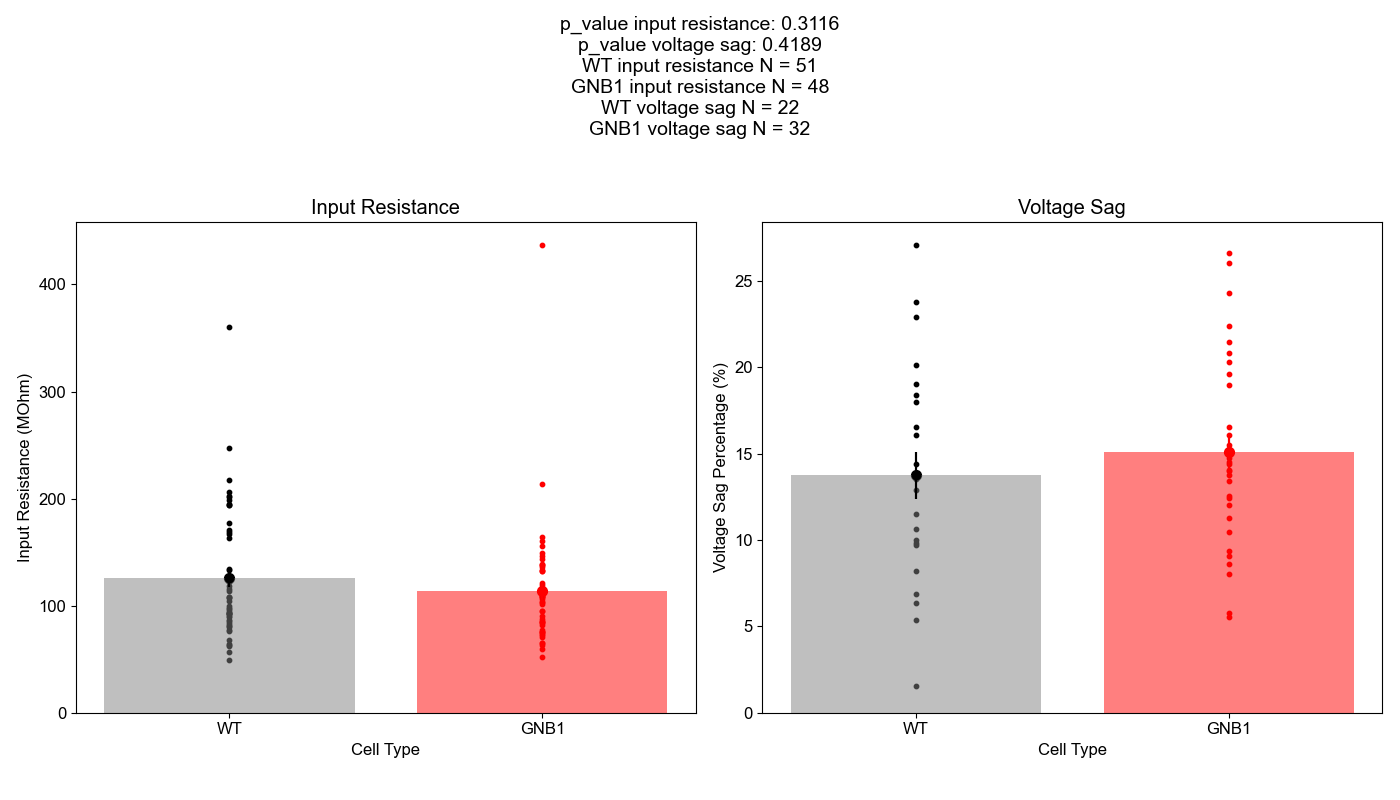

In [20]:
#all input resistances for GNB1 data and WT data

import statistics as stats
from scipy.stats import ttest_ind

fig, ax = plt.subplots(1, 2, figsize=(14, 8))
num_cells_WT_input_resistance = len(all_input_resistances_WT)
num_cells_GNB1_input_resistance = len(all_input_resistances_GNB1)

num_cells_WT_voltage_sag = len(newer_all_voltage_sags_WT)
num_cells_GNB1_voltage_sag = len(newer_all_voltage_sags_GNB1)

ax[0].bar(0, np.mean(all_input_resistances_WT), yerr=np.std(all_input_resistances_WT)/np.sqrt(len(all_input_resistances_WT)), color='grey', alpha=0.5)
ax[0].bar(1, np.mean(all_input_resistances_GNB1), yerr=np.std(all_input_resistances_GNB1)/np.sqrt(len(all_input_resistances_GNB1)), color='red', alpha=0.5)

ax[0].scatter(0, np.mean(all_input_resistances_WT), color='black', s = 50)
ax[0].scatter(1, np.mean(all_input_resistances_GNB1), color='red', s = 50)

#scatter all of the values for WT and GNB1 on top of the bar graphs at the same x value
ax[0].scatter(np.zeros(len(all_input_resistances_WT)), all_input_resistances_WT, color='black', s = 10)
ax[0].scatter(np.ones(len(all_input_resistances_GNB1)), all_input_resistances_GNB1, color='red', s = 10)


ax[0].errorbar(0, np.mean(all_input_resistances_WT), yerr=np.std(all_input_resistances_WT)/np.sqrt(len(all_input_resistances_WT)), fmt='o', color='black')
ax[0].errorbar(1, np.mean(all_input_resistances_GNB1), yerr=np.std(all_input_resistances_GNB1)/np.sqrt(len(all_input_resistances_GNB1)), fmt='o', color='red')

ax[0].set_xticks([0, 1])
ax[0].set_xticklabels(['WT', 'GNB1'])
ax[0].set_title('Input Resistance')
ax[0].set_ylabel('Input Resistance (MOhm)')
ax[0].set_xlabel('Cell Type')


#only data after 04222024
ax[1].bar(0, np.mean(newer_all_voltage_sags_WT), yerr=np.std(newer_all_voltage_sags_WT)/np.sqrt(len(newer_all_voltage_sags_WT)), color='grey', alpha=0.5)
ax[1].bar(1, np.mean(newer_all_voltage_sags_GNB1), yerr=np.std(newer_all_voltage_sags_GNB1)/np.sqrt(len(newer_all_voltage_sags_GNB1)), color='red', alpha=0.5)

ax[1].scatter(0, np.mean(newer_all_voltage_sags_WT), color='black', s = 50)
ax[1].scatter(1, np.mean(newer_all_voltage_sags_GNB1), color='red', s = 50)

#scatter all of the values for WT and GNB1 on top of the bar graphs at the same x value
ax[1].scatter(np.zeros(len(newer_all_voltage_sags_WT)), newer_all_voltage_sags_WT, color='black', s = 10)
ax[1].scatter(np.ones(len(newer_all_voltage_sags_GNB1)), newer_all_voltage_sags_GNB1, color='red', s = 10)

ax[1].errorbar(0, np.mean(newer_all_voltage_sags_WT), yerr=np.std(newer_all_voltage_sags_WT)/np.sqrt(len(newer_all_voltage_sags_WT)), fmt='o', color='black')
ax[1].errorbar(1, np.mean(newer_all_voltage_sags_GNB1), yerr=np.std(newer_all_voltage_sags_GNB1)/np.sqrt(len(newer_all_voltage_sags_GNB1)), fmt='o', color='red')

ax[1].set_xticks([0, 1])
ax[1].set_xticklabels(['WT', 'GNB1'])
ax[1].set_title('Voltage Sag')
ax[1].set_ylabel('Voltage Sag Percentage (%)')
ax[1].set_xlabel('Cell Type')

#do a ttest between the WT and GNB1 cells input resistance and voltage sag
p_values = []
p_values.append(ttest_ind(all_input_resistances_WT, all_input_resistances_GNB1)[1])
p_values.append(ttest_ind(newer_all_voltage_sags_WT, newer_all_voltage_sags_GNB1)[1])

fig.suptitle(
    f'p_value input resistance: {np.round(p_values[0], 4)}\n'
    f'p_value voltage sag: {np.round(p_values[1], 4)}\n'
    f'WT input resistance N = {num_cells_WT_input_resistance}\n'
    f'GNB1 input resistance N = {num_cells_GNB1_input_resistance}\n'
    f'WT voltage sag N = {num_cells_WT_voltage_sag}\n'
    f'GNB1 voltage sag N = {num_cells_GNB1_voltage_sag}', fontsize=14)

fig.tight_layout(rect=[0, 0.03, 1, 0.95])

# plt.savefig('/Users/samgritz/Library/CloudStorage/GoogleDrive-gritz122@gmail.com/My Drive/Rutgers/Milstein_Lab_Data/GNB1_WT_Project/New_Analysis_Processed_Data/GNB1_data/Processed_data/saved_figures/GNB1_vs_WT_data/combined_all_data/Combined_Intrinsic_Properties_WT_GNB1_new.svg')




In [19]:
#close all figures
plt.close('all')

In [ ]:
#convert to a csv file
def convert_to_csv(data_dict, save_path, save_name):
    fine_FI_stim_properties_df = pd.DataFrame(data_dict)
    fine_FI_stim_properties_df.to_csv(save_path + '/' + save_name)